## Titanic Survival Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.describe()
train.head(3)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    418 non-null    int64  
 1   name      418 non-null    object 
 2   sex       418 non-null    object 
 3   age       332 non-null    float64
 4   sibsp     418 non-null    int64  
 5   parch     418 non-null    int64  
 6   ticket    418 non-null    object 
 7   fare      417 non-null    float64
 8   cabin     91 non-null     object 
 9   embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


Add survived column to test

In [7]:
s = pd.Series([-1], name="survived")
s = s.repeat(len(test.index))
s = s.to_frame()
s = s.reset_index(drop=True)
test_survived = pd.concat([s, test], axis = 1)
test_survived.shape

(418, 11)

In [8]:
data_combined = pd.concat([train, test_survived], ignore_index=True)

In [9]:
data_combined.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1304,-1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,-1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,-1,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,-1,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,-1,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
data_combined.shape

(1309, 11)

## EDA




1.SURVIVED

0    549
1    342
Name: survived, dtype: int64

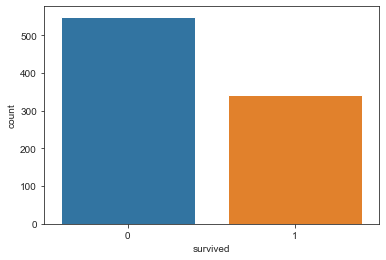

In [11]:
train['survived'].value_counts()
survival_plot = sns.countplot(x="survived",data=train)

#### We'll make a df train_mod to represent the feature engineered df

In [12]:
train_mod = pd.DataFrame(train['survived']).astype('int64')
train_mod.tail(3)

,survived
888,0
889,1
890,0


2.pclass

3    491
1    216
2    184
Name: pclass, dtype: int64

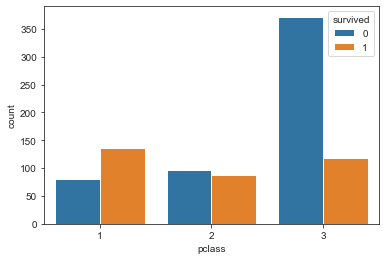

In [13]:
train['pclass'].value_counts()
sns.countplot(x="pclass",hue="survived",data=train)
plt.show()

In [14]:
train_mod['pclass'] = train['pclass'].astype('category')

In [15]:
print(train_mod.dtypes)

survived       int64
pclass      category
dtype: object







3. name

In [16]:
train['name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: name, dtype: object

In [17]:
# Extract Title from names
title = data_combined['name'].str.split(' ',expand=True)[:][1]
title.value_counts()[:10]

Mr.          736
Miss.        256
Mrs.         191
Master.       59
Dr.            8
y              8
Rev.           8
Planke,        4
Col.           4
Billiard,      3
Name: 1, dtype: int64

In [18]:
data_combined['Titles'] = title

In [19]:
title_by_age = pd.pivot_table(data_combined, values='age',
                       index='Titles', aggfunc=[np.min, np.max,'count'])
title_by_age.sort_values(by=('count', 'age'),ascending=False)

,amin,amax,count
,age,age,age
Mr.,11.00,80.0,562
Miss.,0.17,63.0,206
Mrs.,14.00,76.0,164
Master.,0.33,14.5,52
Rev.,27.00,57.0,8
y,17.00,39.0,7
Dr.,23.00,54.0,7
"Planke,",16.00,31.0,4
Col.,47.00,60.0,4


There are four prominent titles
1. Master.
* Mr.
* Miss.
* Mrs.
We'll convert all the the titles to these four.
From above pivot table Master. and Mr. can sorted by sex as male and age as <= or > 15

In [20]:
miss_titles = ['Miss.','Ms.','Mlle.','Dr.']
#mrs_titles = ['Mrs.','Mme.','Dona.','the','Jonkheer','Don.','Lady.']

In [21]:
for index,row in data_combined.iterrows():
    if row['sex'] == 'male':
        if row['age'] <= 15:
            data_combined.loc[index, 'Titles'] = 'Master.'
        else:
            data_combined.loc[index, 'Titles'] = 'Mr.'
    if row['sex'] == 'female':
        if any(x in row['name'] for x in miss_titles):
            data_combined.loc[index, 'Titles'] = 'Miss.'
        else:
            data_combined.loc[index, 'Titles'] = 'Mrs.'

data_combined['Titles'].value_counts()

Mr.        784
Miss.      265
Mrs.       201
Master.     59
Name: Titles, dtype: int64

In [22]:


# Pivot table on age and title
#data_combined['Titles'] = title
np.where(train['age'] == 63)
train.loc[275,'name']

(array([275, 483], dtype=int64),)

'Andrews, Miss. Kornelia Theodosia'

In [23]:
table = pd.pivot_table(data_combined, values='age',
                       index='Titles', aggfunc=[np.min, np.max])
table

,amin,amax
,age,age
Titles,,
Master.,0.33,15.0
Miss.,0.17,63.0
Mr.,16.00,80.0
Mrs.,14.00,76.0


##### add to dataframe and graph

In [24]:
#data_combined['Titles'] = title.astype('category')

In [25]:
train_mod = data_combined[1:891][:]

In [26]:
train_mod.pivot_table(values='survived',columns=['Titles'],
                      index=['pclass'],aggfunc=np.mean)

Titles,Master.,Miss.,Mr.,Mrs.
pclass,,,,
1,1.000000,0.959184,0.352941,0.977778
2,1.000000,0.942857,0.080808,0.902439
3,0.321429,0.500000,0.119497,0.500000


In [27]:
NewTrain = data_combined.loc[:890,:]

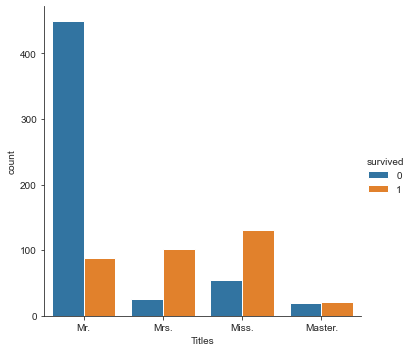

In [28]:
s= sns.catplot(data=NewTrain, x="Titles", hue="survived"
               , kind="count")


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


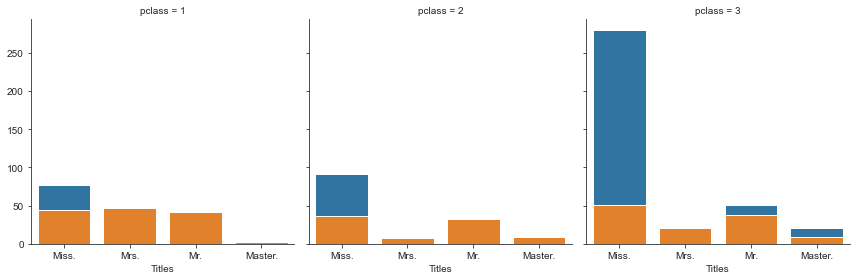

In [29]:
s = sns.FacetGrid(train_mod, col='pclass', hue="survived",
                  size=4)
s = s.map(sns.countplot,"Titles")






4. sex

male      577
female    314
Name: sex, dtype: int64

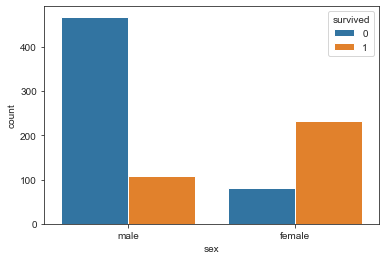

In [30]:
train['sex'].value_counts()
sex_plot = sns.countplot(data=train, x="sex", hue="survived")

sex seems important but that information has already been
encoded in Titles, so we'll not add that to train_mod







5.age

In [31]:
print(train['age'].dtype)
train['age'].head(10)
train['age'].describe()

float64


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [32]:
train['age'].isnull().sum()
test['age'].isnull().sum()

177

86

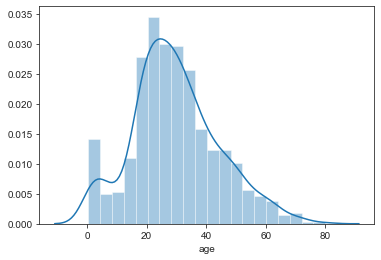

In [33]:
age_plot = sns.distplot(train['age'],bins=20,hist=True)

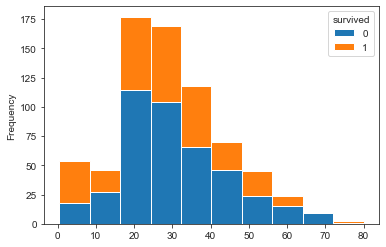

In [34]:
train.pivot(columns=['survived'])['age'].\
    plot(kind='hist', stacked=True)
#display()







6. sibsp


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

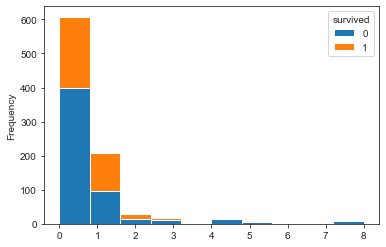

In [35]:
train['sibsp'].value_counts()
train.pivot(columns=['survived'])['sibsp'].plot(kind='hist', stacked=True)

We'll add sibsp to train_mod

In [36]:
train_mod['sibsp'] = train['sibsp']







7. parch

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

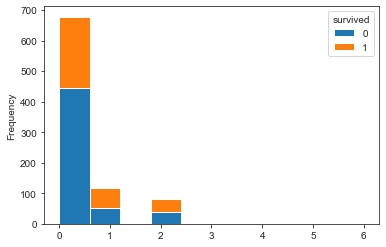

In [37]:
train['parch'].value_counts()
train.pivot(columns=['survived'])['parch'].plot(kind='hist', stacked=True)

We'll add sibsp to train_mod

In [38]:
train_mod['parch'] = train['parch']





8.ticket

In [39]:
train['ticket'].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: ticket, dtype: object

There doesn't seem to be any particular pattern or
information in this. So we won't use this column







9. fare

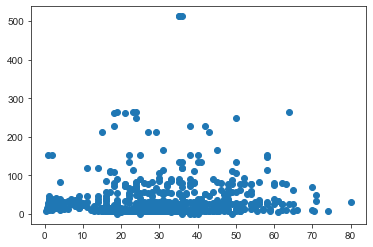

In [40]:
plt.scatter(train['age'], train['fare'])

In [41]:
#s = sns.FacetGrid(train, col='pclass')
#s = sns.distplot( train['fare'],bins= 10, hist=True)




10. cabin

In [42]:
train['cabin'].isnull().sum()

687

Since most values are null we won't consider this column.






11. embarked

2

     survived  pclass                                       name     sex  \
61          1       1                        Icard, Miss. Amelie  female   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      age  sibsp  parch  ticket  fare cabin embarked  
61   38.0      0      0  113572  80.0   B28      NaN  
829  62.0      0      0  113572  80.0   B28      NaN  


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


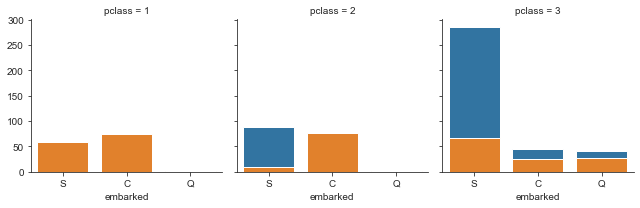

In [43]:
train['embarked'].isnull().sum()
print(train[train['embarked'].isnull()])
embarked_plot = sns.FacetGrid(train, col='pclass', hue='survived')
embarked_plot = embarked_plot.map(sns.countplot,"embarked")






## We'll come back to age later

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [45]:
data_combined_mod = data_combined[:][['sibsp','parch','pclass','age','Titles']]

In [46]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_combined_mod[['Titles']]).toarray())
data_combined_mod = data_combined_mod.join(enc_df)
data_combined_mod.drop(columns='Titles',inplace=True)
data_combined_mod

,sibsp,parch,pclass,age,0,1,2,3
0,1,0,3,22.0,0.0,0.0,1.0,0.0
1,1,0,1,38.0,0.0,0.0,0.0,1.0
2,0,0,3,26.0,0.0,1.0,0.0,0.0
3,1,0,1,35.0,0.0,0.0,0.0,1.0
4,0,0,3,35.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1304,0,0,3,NaN,0.0,0.0,1.0,0.0
1305,0,0,1,39.0,0.0,0.0,0.0,1.0
1306,0,0,3,38.5,0.0,0.0,1.0,0.0
1307,0,0,3,NaN,0.0,0.0,1.0,0.0


In [47]:
imputer1 = IterativeImputer(LinearRegression(),max_iter=10,random_state=0)
data_combined_mod_imputed = pd.DataFrame(imputer1.fit_transform(data_combined_mod))
data_combined_mod_imputed

,0,1,2,3,4,5,6,7
0,1.0,0.0,3.0,22.000000,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,38.000000,0.0,0.0,0.0,1.0
2,0.0,0.0,3.0,26.000000,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,35.000000,0.0,0.0,0.0,1.0
4,0.0,0.0,3.0,35.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1304,0.0,0.0,3.0,28.897226,0.0,0.0,1.0,0.0
1305,0.0,0.0,1.0,39.000000,0.0,0.0,0.0,1.0
1306,0.0,0.0,3.0,38.500000,0.0,0.0,1.0,0.0
1307,0.0,0.0,3.0,28.897226,0.0,0.0,1.0,0.0


In [48]:
train_df = data_combined_mod_imputed.iloc[:891]
label = train['survived']

### Model building and evaluation

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train , y_test = \
train_test_split(train_df, label, test_size=.2,random_state=11)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg = LogisticRegression()

In [52]:
reg.fit(X_train,y_train)
test_pred = reg.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,test_pred))
print("Confusion Matrix")
metrics.confusion_matrix(y_test,test_pred)
print("Precision:", metrics.precision_score(y_test, test_pred))
print("Recall:", metrics.recall_score(y_test, test_pred))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy:  0.8770949720670391
Confusion Matrix


array([[110,   8],
       [ 14,  47]], dtype=int64)

Precision: 0.8545454545454545
Recall: 0.7704918032786885


In [53]:
#%


